In [156]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [157]:
df=pd.read_csv("/content/delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [158]:
df=df.rename({'Delivery Time':'deliverytime','Sorting Time':'sortingtime'},axis=1)
df

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [159]:
df.describe()

,deliverytime,sortingtime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   deliverytime  21 non-null     float64
 1   sortingtime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Text(0.5, 1.0, 'Sorting Time')

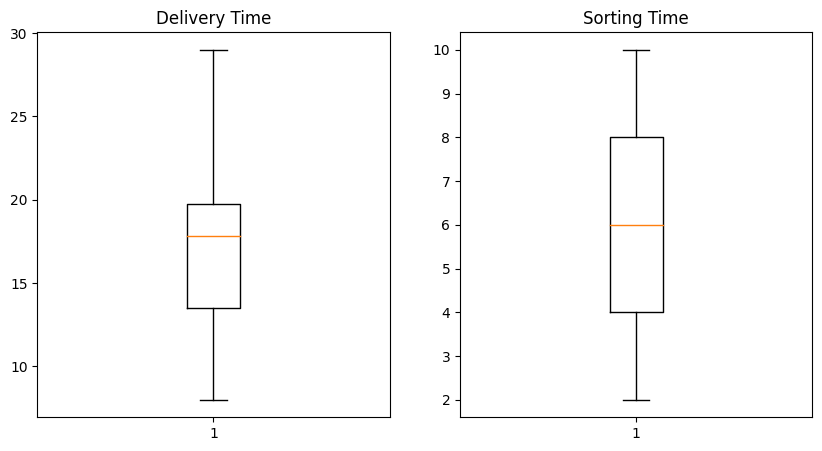

In [161]:
plt.subplots(figsize=(10,5))
plt.subplot(121)
plt.boxplot(df['deliverytime'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['sortingtime'])
plt.title('Sorting Time')

<Axes: xlabel='sortingtime', ylabel='Density'>

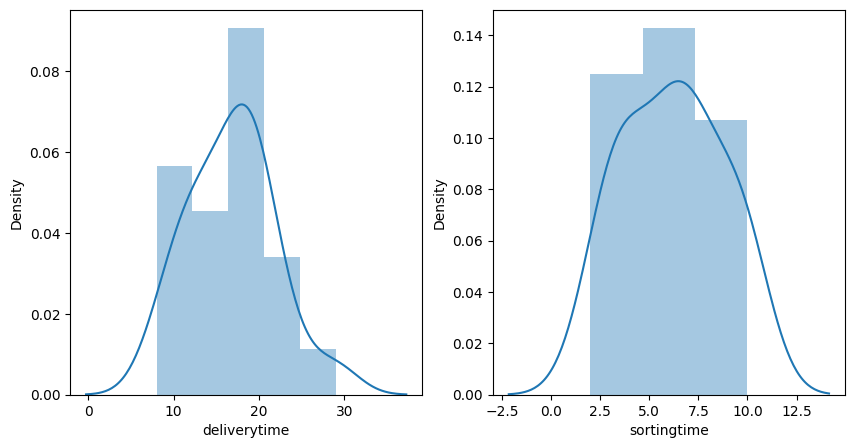

In [162]:
plt.subplots(figsize=(10,5))
plt.subplot(121)
sns.distplot(df['deliverytime'])
plt.subplot(122)
sns.distplot(df['sortingtime'])

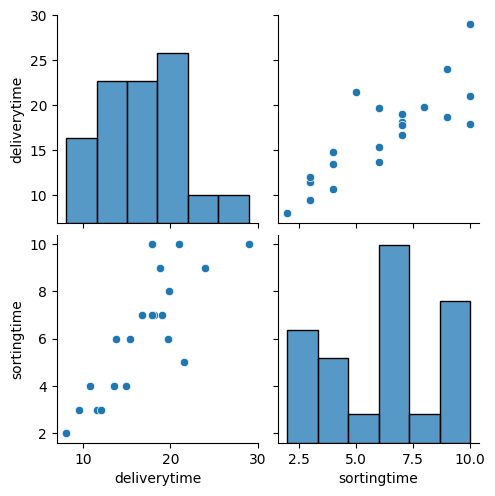

In [163]:
sns.pairplot(df)

**finding the correlation between two varaible**

In [164]:
df.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.825997
sortingtime,0.825997,1.000000


Visualixation of correlation between x and y

<Axes: xlabel='sortingtime', ylabel='deliverytime'>

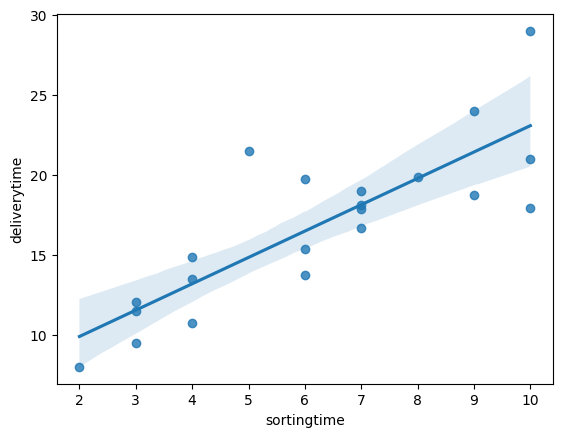

In [165]:
sns.regplot(x=df['sortingtime'],y=df['deliverytime'])

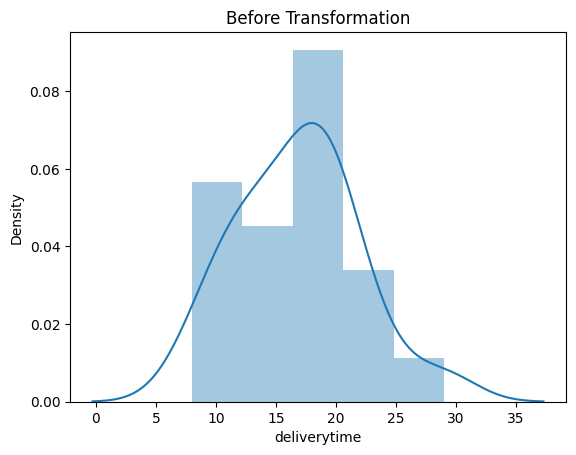

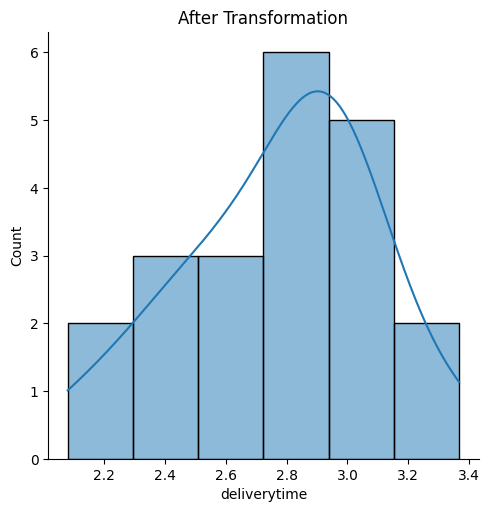

In [166]:
sns.distplot(df['deliverytime'], kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['deliverytime']), kde = True)
plt.title('After Transformation')
plt.show()

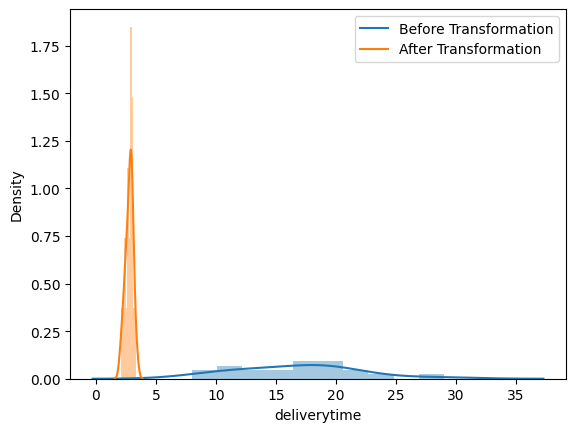

In [167]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['deliverytime'], bins = 10, kde = True)
sns.distplot(np.log(df['deliverytime']), bins = 10, kde = True)
plt.legend(labels)
plt.show()



Text(0.5, 1.0, 'cube root trasnformation')

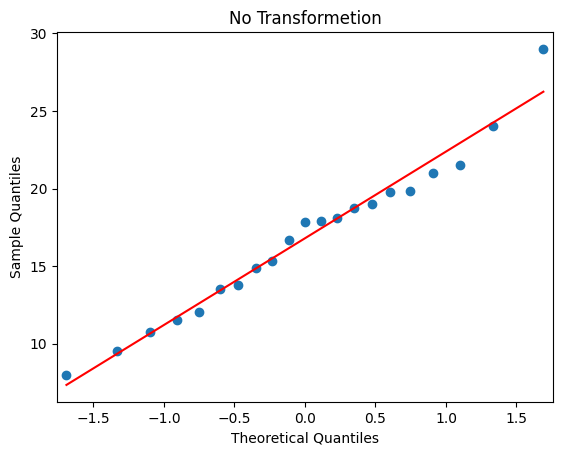

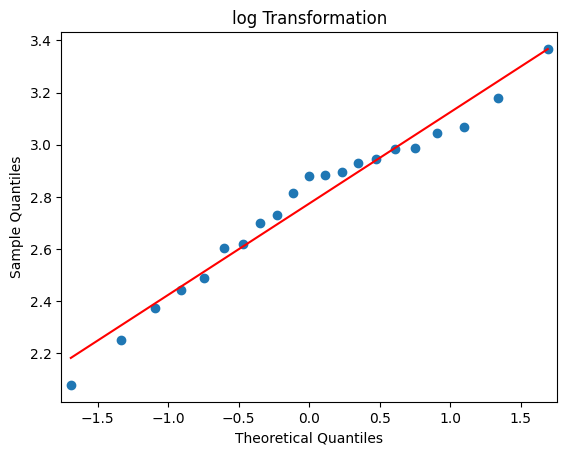

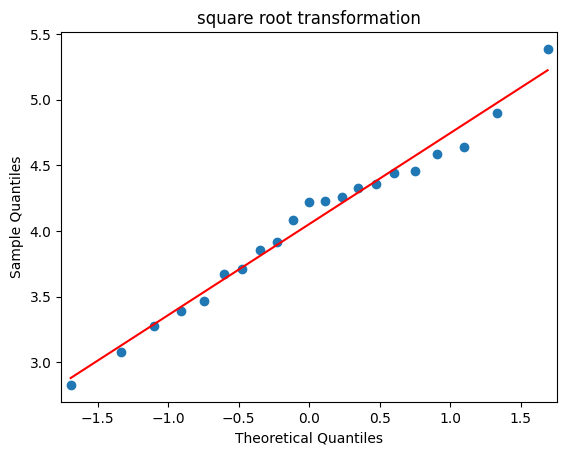

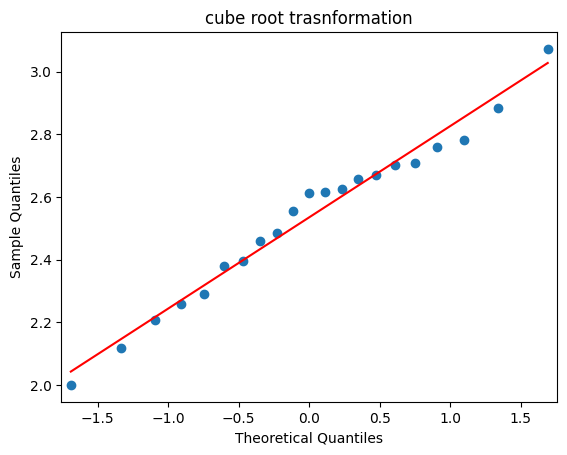

In [168]:
smf.qqplot(df['deliverytime'],line='r')
plt.title('No Transformetion')
smf.qqplot(np.log(df['deliverytime']),line='r')
plt.title('log Transformation')
smf.qqplot(np.sqrt(df['deliverytime']),line='r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['deliverytime']),line='r')
plt.title('cube root trasnformation')

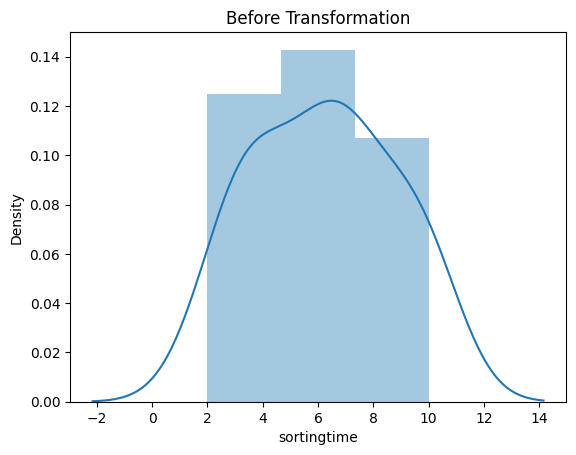

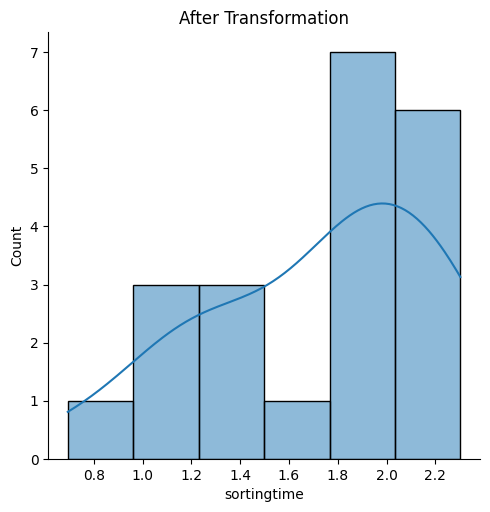

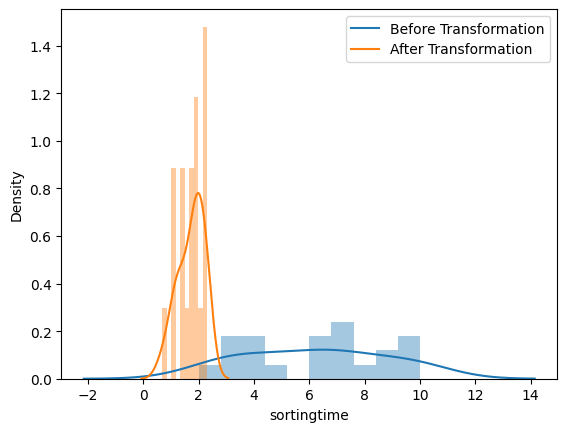

Text(0.5, 1.0, 'cube root trasnformation')

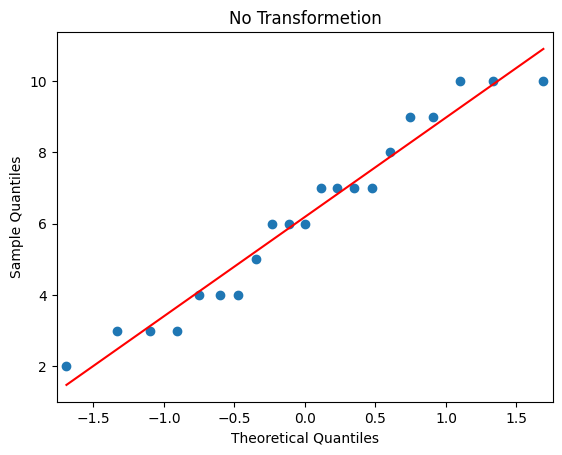

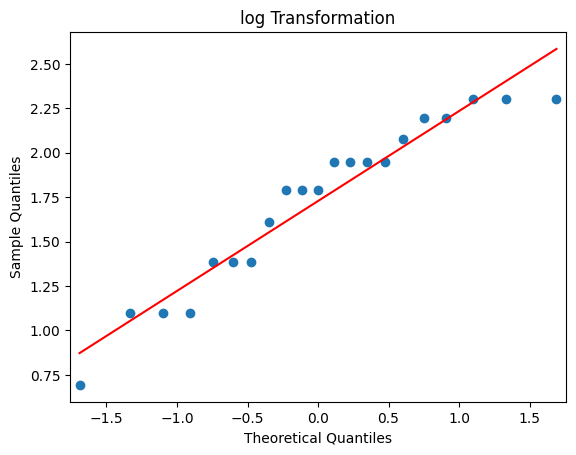

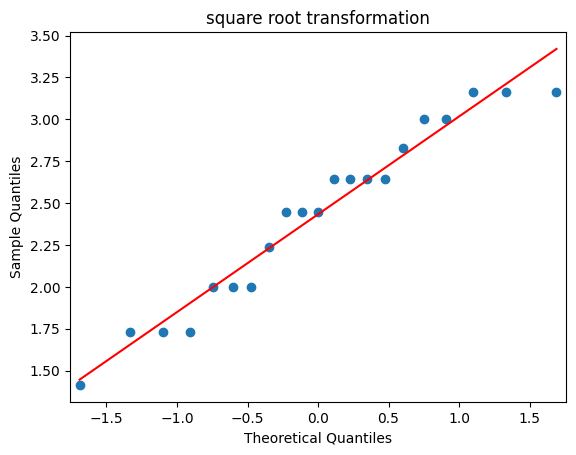

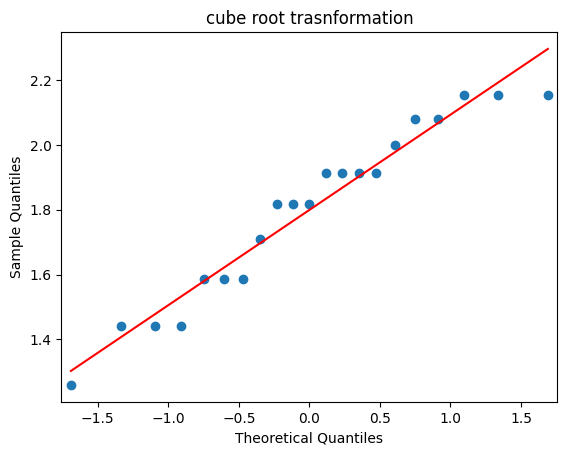

In [169]:
sns.distplot(df['sortingtime'], kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['sortingtime']), kde = True)
plt.title('After Transformation')
plt.show()

labels = ['Before Transformation','After Transformation']
sns.distplot(df['sortingtime'], bins = 10, kde = True)
sns.distplot(np.log(df['sortingtime']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

smf.qqplot(df['sortingtime'],line='r')
plt.title('No Transformetion')
smf.qqplot(np.log(df['sortingtime']),line='r')
plt.title('log Transformation')
smf.qqplot(np.sqrt(df['sortingtime']),line='r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['sortingtime']),line='r')
plt.title('cube root trasnformation')



Fitting a linear model regression

In [170]:
model=sm.ols('deliverytime~sortingtime',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 10 May 2023   Prob (F-statistic):           3.98e-06
Time:                        15:30:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
model1=sm.ols('np.log(deliverytime)~np.log(sortingtime)',data=df).fit()
model1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliverytime)   R-squared:                       0.772
Model:                              OLS   Adj. R-squared:                  0.760
Method:                   Least Squares   F-statistic:                     64.39
Date:                  Wed, 10 May 2023   Prob (F-statistic):           1.60e-07
Time:                          15:30:36   Log-Likelihood:                 10.291
No. Observations:                    21   AIC:                            -16.58
Df Residuals:                        19   BIC:                            -14.49
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sortingtime)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
model2=sm.ols('np.sqrt(deliverytime)~np.sqrt(sortingtime)',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.sqrt(deliverytime)   R-squared:                       0.729
Model:                               OLS   Adj. R-squared:                  0.715
Method:                    Least Squares   F-statistic:                     51.16
Date:                   Wed, 10 May 2023   Prob (F-statistic):           8.48e-07
Time:                           15:30:36   Log-Likelihood:                -5.7320
No. Observations:                     21   AIC:                             15.46
Df Residuals:                         19   BIC:                             17.55
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sortingtime)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
model3=sm.ols('np.cbrt(deliverytime)~np.cbrt(sortingtime)',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.cbrt(deliverytime)   R-squared:                       0.744
Model:                               OLS   Adj. R-squared:                  0.731
Method:                    Least Squares   F-statistic:                     55.25
Date:                   Wed, 10 May 2023   Prob (F-statistic):           4.90e-07
Time:                           15:30:36   Log-Likelihood:                 13.035
No. Observations:                     21   AIC:                            -22.07
Df Residuals:                         19   BIC:                            -19.98
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sortingtime)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
model4=sm.ols('np.square(deliverytime)~np.cbrt(sortingtime)',data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.square(deliverytime)   R-squared:                       0.591
Model:                                 OLS   Adj. R-squared:                  0.570
Method:                      Least Squares   F-statistic:                     27.49
Date:                     Wed, 10 May 2023   Prob (F-statistic):           4.63e-05
Time:                             15:30:36   Log-Likelihood:                -129.16
No. Observations:                       21   AIC:                             262.3
Df Residuals:                           19   BIC:                             264.4
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -629.9295    180.473     -3.490      0.002   -1007.664    -252.195
np.cbrt(sortingtime)   520.4197     99.252      5.243      0.000     312.682     728.157
==============================================================================
Omnibus:                       13.005   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.388
Skew:                           1.412   Prob(JB):                      0.00337
Kurtosis:                       5.245   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LOG TRANSFORMATION OF THE DATA AS HEIGHTS R SQUARED AND AJUSTED R SQUARE THAN ALL OTHER MODEL.

In [175]:
model.params


Intercept      6.582734
sortingtime    1.649020
dtype: float64

In [176]:
print(model.tvalues,'\n',model.pvalues)

Intercept      3.823349
sortingtime    6.387447
dtype: float64 
 Intercept      0.001147
sortingtime    0.000004
dtype: float64


In [177]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Test for Normality of Residuals (Q-Q Plot)

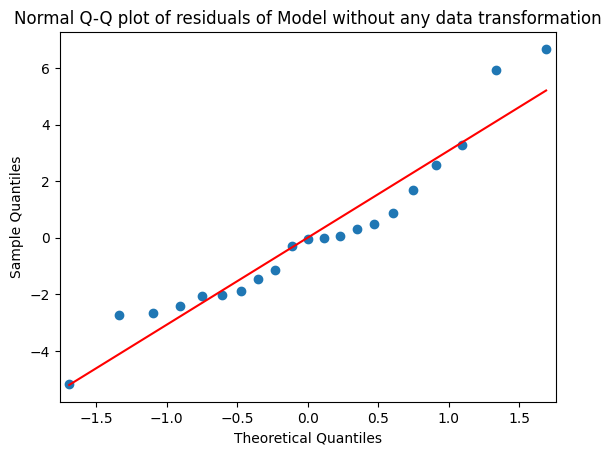

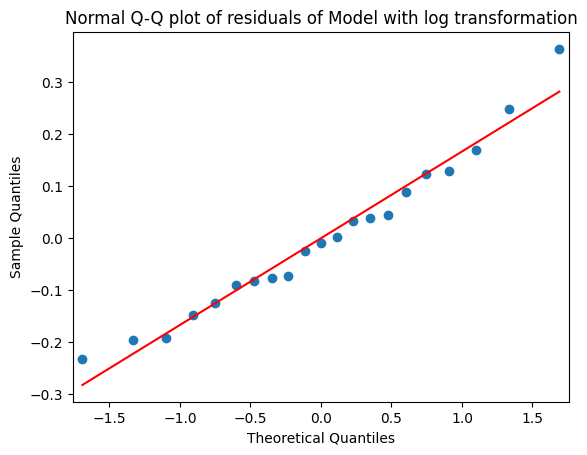

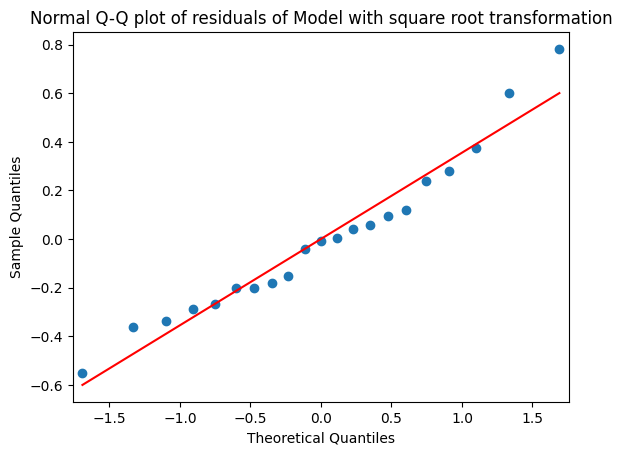

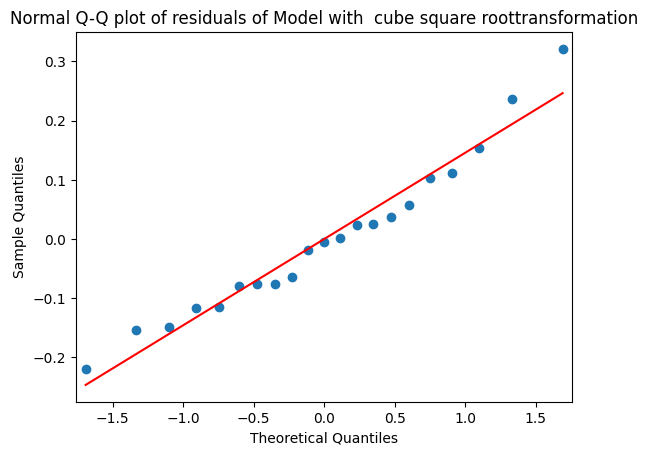

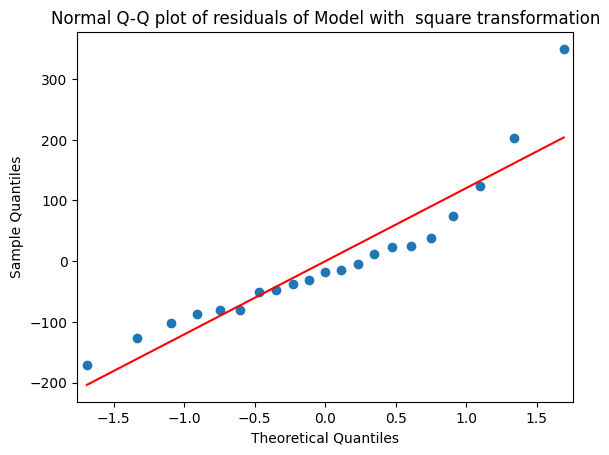

In [178]:
smf.qqplot(model.resid,line='r')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
smf.qqplot(model1.resid,line='r')
plt.title('Normal Q-Q plot of residuals of Model with log transformation')
smf.qqplot(model2.resid,line='r')
plt.title('Normal Q-Q plot of residuals of Model with square root transformation')
smf.qqplot(model3.resid,line='r')
plt.title('Normal Q-Q plot of residuals of Model with  cube square roottransformation')
smf.qqplot(model4.resid,line='r')
plt.title('Normal Q-Q plot of residuals of Model with  square transformation')
plt.show()

In [196]:
model2_pred_y =np.square(model2.predict(df['sortingtime'])) #model2 is used squreroot transformation
model3_pred_y =pow(model3.predict(df['sortingtime']),3)#model3 is used for cube root tansformation
model1_pred_y =np.exp(model1.predict(df['sortingtime']))#model1 is used for log transformation


In [199]:
model1_rmse =np.sqrt(mean_squared_error(df['deliverytime'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df['deliverytime'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df['deliverytime'], model3_pred_y))

print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

model= 2.934903768890139 
model1= 2.745828897614548 
model2= 2.762294279320867 
model3= 2.755584309893576


'model1'

In [210]:
predicted = pd.DataFrame()
predicted['sortingtime'] = df.sortingtime
predicted['deliverytime'] = df.deliverytime
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model1.predict(predicted.sortingtime)))
predicted

,sortingtime,deliverytime,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


In [211]:
predicted1 = pd.DataFrame()
predicted1['sortingtime'] = df.sortingtime
predicted1['deliverytime'] = df.deliverytime
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.sortingtime))
predicted1

,sortingtime,deliverytime,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
